<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-preparing-data" data-toc-modified-id="Loading-and-preparing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and preparing data</a></span></li><li><span><a href="#Differences-in-color-semantics-between-sighted-and-blind-in-combined-data" data-toc-modified-id="Differences-in-color-semantics-between-sighted-and-blind-in-combined-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Differences in color semantics between sighted and blind in combined data</a></span><ul class="toc-item"><li><span><a href="#COCA-fiction" data-toc-modified-id="COCA-fiction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>COCA-fiction</a></span></li><li><span><a href="#COCA-fiction-without-1st-order-cooccurrence-of-color-and-dimension-words" data-toc-modified-id="COCA-fiction-without-1st-order-cooccurrence-of-color-and-dimension-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>COCA-fiction without 1st order cooccurrence of color and dimension words</a></span></li><li><span><a href="#COCA-fiction-without-100-nearest-neighbors-of-each-dimension-word" data-toc-modified-id="COCA-fiction-without-100-nearest-neighbors-of-each-dimension-word-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>COCA-fiction without 100 nearest neighbors of each dimension word</a></span></li><li><span><a href="#COCA-fiction-without-names-provided-by-participants-for-color-semantic-dimensions" data-toc-modified-id="COCA-fiction-without-names-provided-by-participants-for-color-semantic-dimensions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>COCA-fiction without names provided by participants for color-semantic dimensions</a></span></li></ul></li><li><span><a href="#Convert-notebook-to-html" data-toc-modified-id="Convert-notebook-to-html-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convert notebook to html</a></span></li></ul></div>

In [1]:
%matplotlib inline
from IPython.display import display, display_markdown

import subprocess as sp
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import bambi
import copy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300

from subs2vec.utensils import log_timer
from subs2vec.vecs import Vectors
from subs2vec.neighbors import compute_nn

def display_md(md, **kwargs):
    return display_markdown(md, raw=True, **kwargs)

def convert_notebook(title, output='html'):
    convert = sp.run(f'jupyter nbconvert {title}.ipynb --to {output} --output {title}.{output}'.split(' '))
    if convert.returncode == 0:
        display_md(f'Jupyter notebook `{title}` converted successfully.')
    else:
        display_md(f'Error: encountered problem converting Jupyter notebook `{title}`')

def download(fname):
    dl = sp.run(f'wget {fname}'.split(' '))
    if dl.returncode == 0:
        display_md(f'Download of `{fname}` succesful.')
    else:
        display_md(f'Download of `{fname}` failed.')
        
@log_timer
def filter_vecs(vecs, filter_words):
    filtered_vecs = copy.deepcopy(vecs)
    filtered_vecs.vectors = filtered_vecs.vectors[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.words = filtered_vecs.words[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.n = len(filtered_vecs.words)
    display_md(f'Filtered {vecs.n} vectors, {filtered_vecs.n} remaining.')
    return filtered_vecs

def norm(x):
    return x / np.linalg.norm(x, 2)

sns.set(style='whitegrid')
pd.options.mode.chained_assignment = None

# Loading and preparing data

In [2]:
df_joint = pd.read_csv('data_plus_predictors.tsv', sep='\t')
display(df_joint)

,index,group,dimension,pp_id,color,rating,experiment,self_vs_other,art,fiction,...,sighted,group_eff,group_z,original,replication_1,replication_2,other,self,self_vs_other_eff,self_vs_other_z
0,0,sighted,cold-hot,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
1,1,sighted,ripe-unripe,sighted_1,white,7,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
2,2,sighted,new-old,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
3,3,sighted,submissive-aggressive,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
4,4,sighted,selfless-jealous,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42975,28507,sighted,light-heavy,sighted_68129,red,5,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42976,28508,sighted,relaxed-tense,sighted_68129,red,5,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42977,28509,sighted,alive-dead,sighted_68129,red,6,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42978,28510,sighted,fast-slow,sighted_68129,red,3,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199


# Differences in color semantics between sighted and blind in combined data

## COCA-fiction

In [4]:
m_fic = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'])
r_fic = m_fic.fit(
    'rating_z ~ 1'
    + ' + group_eff*frequency_z'
    + ' + group_eff*concreteness_z'
    + ' + group_eff*cosine_fic_z'
    + ' + group_eff*swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z + swow_all_z|pp_id',
        '1 + group_eff|dimension',
        '1 + group_eff|color',
    ],
    init='advi+adapt_diag',
    chains=2,
    draws=1000,
    tune=1000,
    n_init=10000,
    return_inferencedata=False,
)

Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 39,705
[INFO] Finished [100%]: Average Loss = 39,705
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, group_eff:swow_all_z, swow_all_z, group_eff:cosine_fic_z, cosine_fic_z, group_eff:concreteness_z, concreteness_z, group_eff:frequency_z, frequency_z, group_eff, Intercept]
[INFO] NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|p

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2585 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2585 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


[INFO] finding looplift candidates


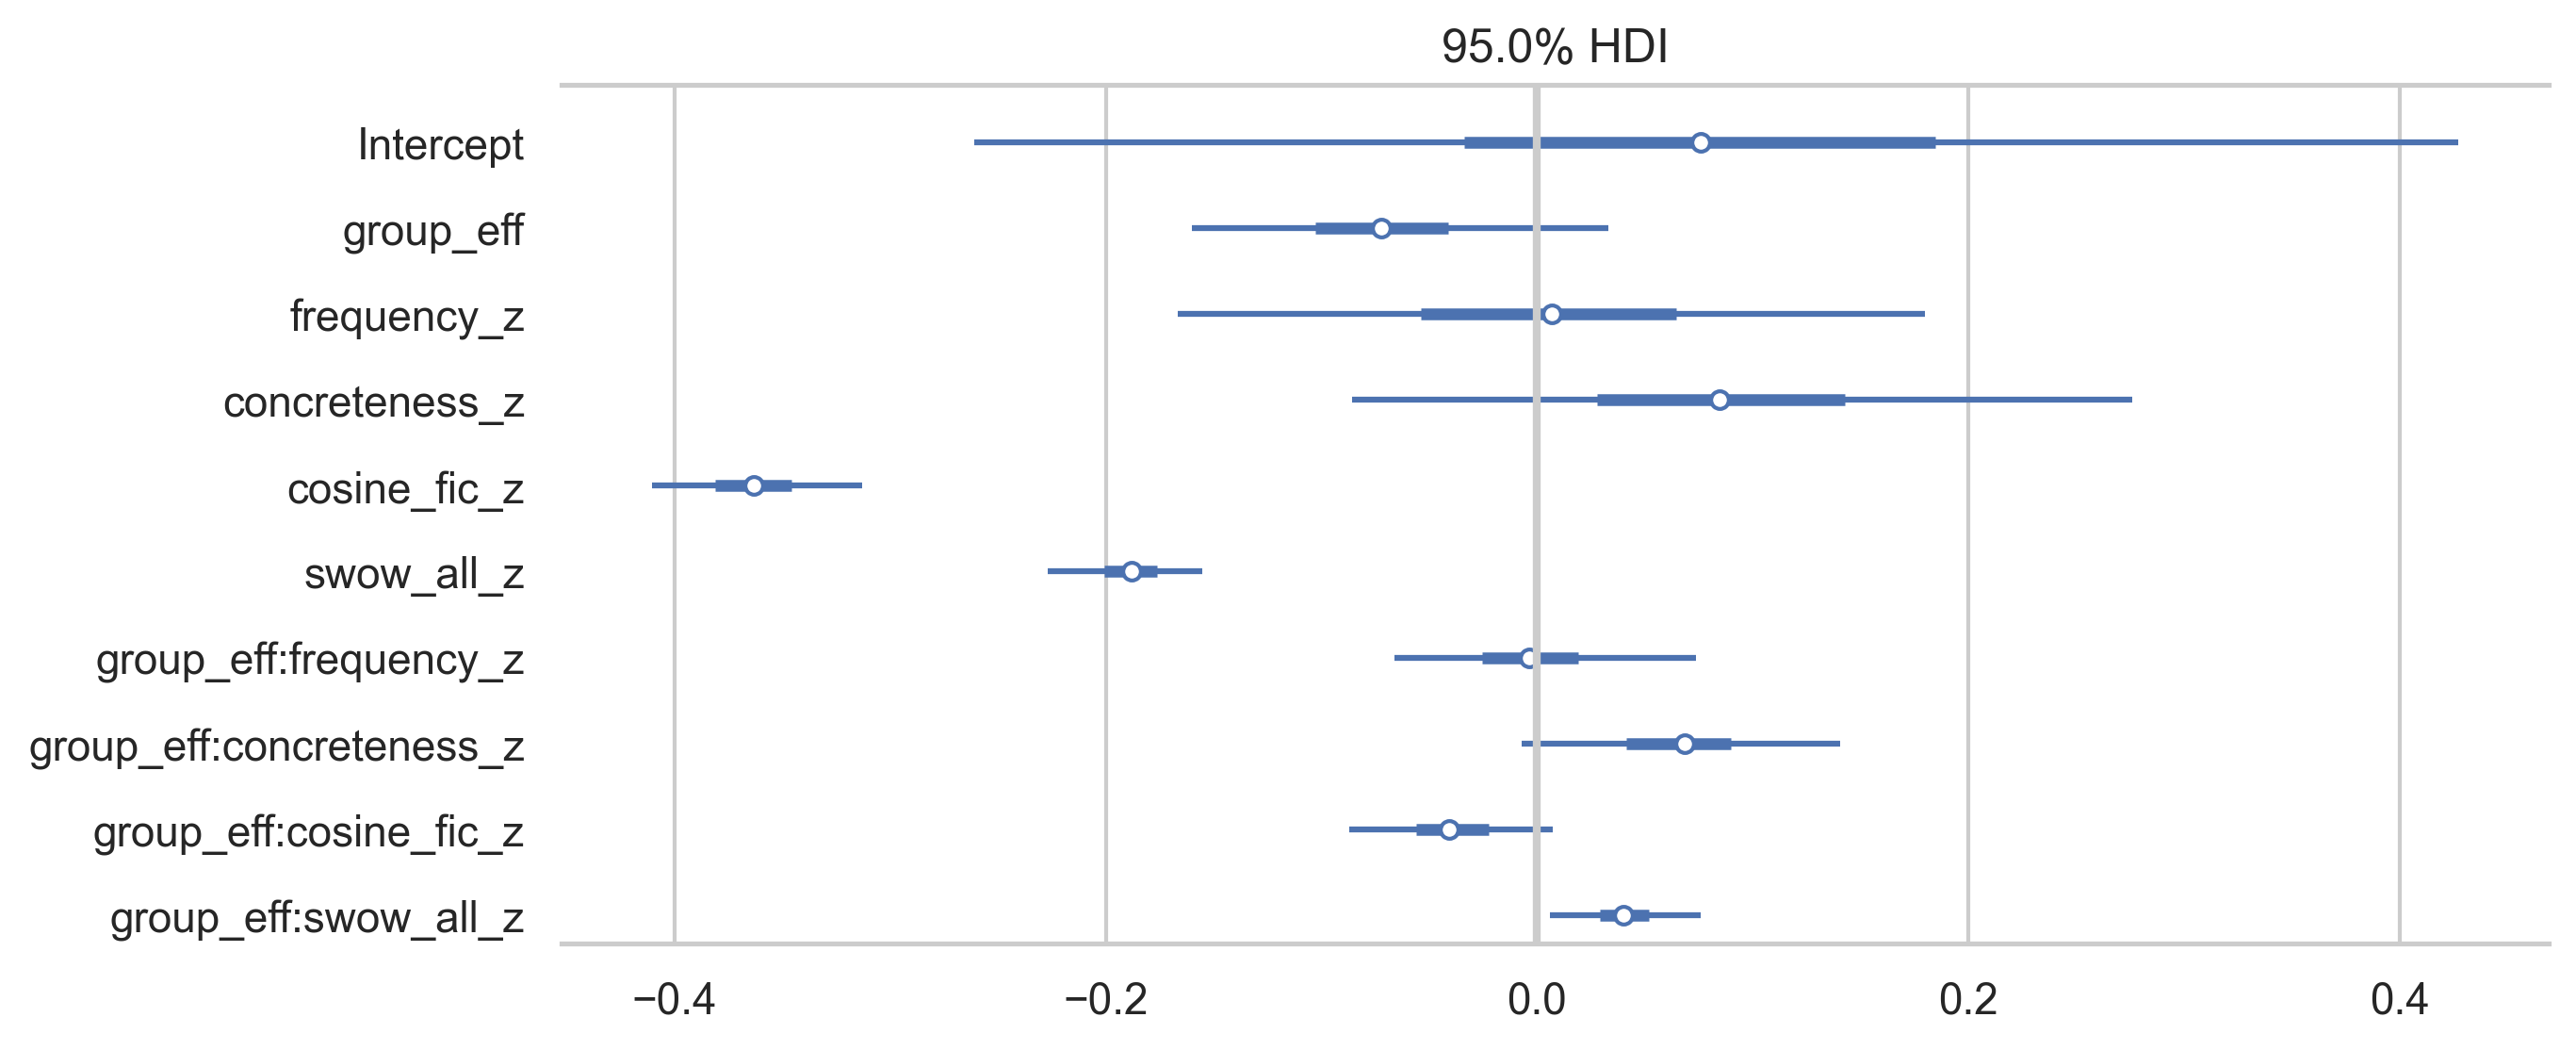

In [5]:
varnames = [
    'Intercept',
    'group_eff',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'swow_all_z',
    'group_eff:frequency_z',
    'group_eff:concreteness_z',
    'group_eff:cosine_fic_z',
    'group_eff:swow_all_z',
]
g = az.plot_forest(r_fic, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
[INFO] finding looplift candidates


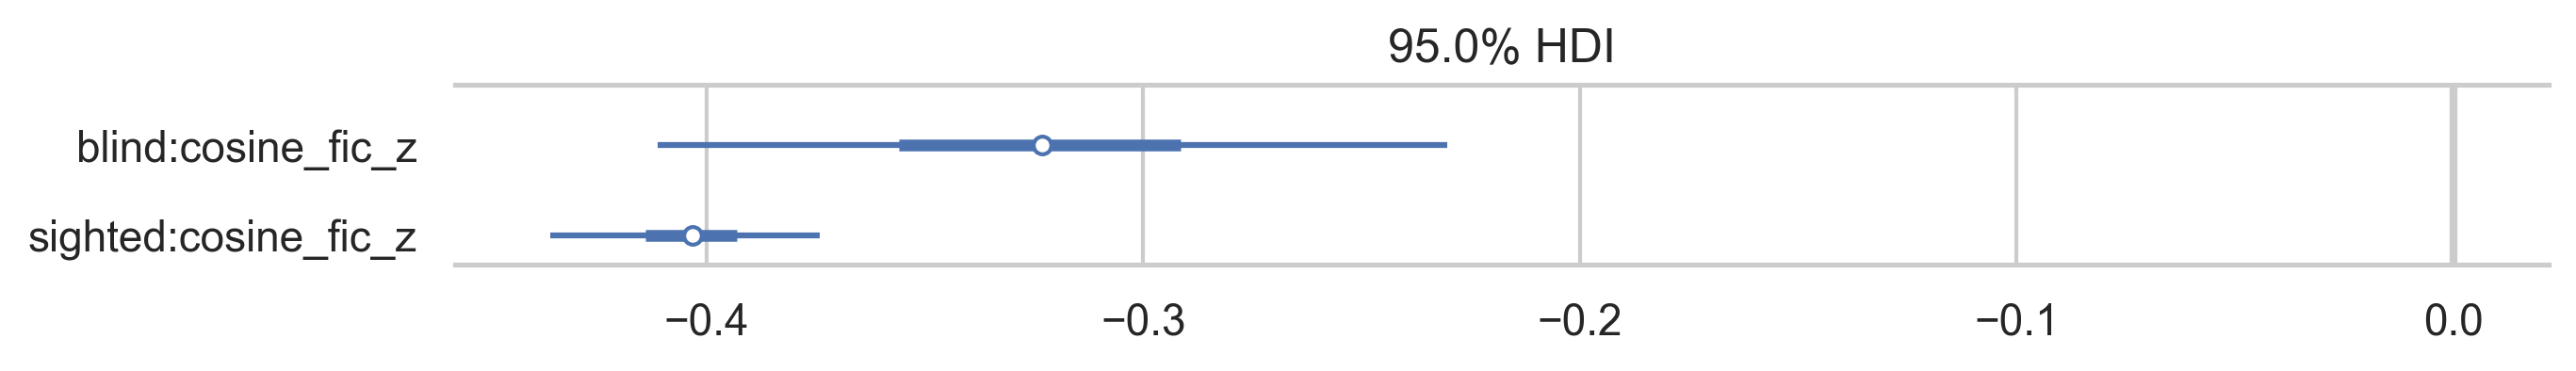

In [11]:
# compute and plot conditional effect of cosine in sighted and blind groups
from copy import deepcopy
trace = deepcopy(m_fic.backend.trace)
trace.add_values({
    # effect of cosine in blind group in orginal experiment
    'blind:cosine_fic_z': trace['cosine_fic_z'] - trace['group_eff:cosine_fic_z'],
    # effect of cosine in sighted group across both experiments
    'sighted:cosine_fic_z': trace['cosine_fic_z'] + trace['group_eff:cosine_fic_z'],
})

varnames = ['blind:cosine_fic_z', 'sighted:cosine_fic_z']
g = az.plot_forest(trace, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## COCA-fiction without 1st order cooccurrence of color and dimension words

In [12]:
m_fic_filtered = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'])
r_fic_filtered = m_fic_filtered.fit(
    'rating_z ~ 1'
    + ' + group_eff*frequency_z'
    + ' + group_eff*concreteness_z'
    + ' + group_eff*cosine_fic_filtered_z'
    + ' + group_eff*swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_filtered_z + swow_all_z|pp_id',
        '1 + group_eff|dimension',
        '1 + group_eff|color',
    ],
    init='advi+adapt_diag',
    chains=2,
    draws=1000,
    tune=1000,
    n_init=10000,
    return_inferencedata=False,
)

The random argument has been deprecated, please use group_specific
[WARNING] The random argument has been deprecated, please use group_specific
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 39,506
[INFO] Finished [100%]: Average Loss = 39,506
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_filtered_z|pp_id_offset, cosine_fic_filtered_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, group_eff:swow_all_z, swow_all_z, group_eff:cosine_fic_filtered_z, cosine_fic_filtered_z, group_eff:concreteness_z, concreteness_z, group_eff:frequency_z, frequency_z, group_eff, Intercept]
[INFO] NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_off

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2316 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2316 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
[ERROR] There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
[INFO] The number of effective samples is smaller than 25% for some parameters.


[INFO] finding looplift candidates


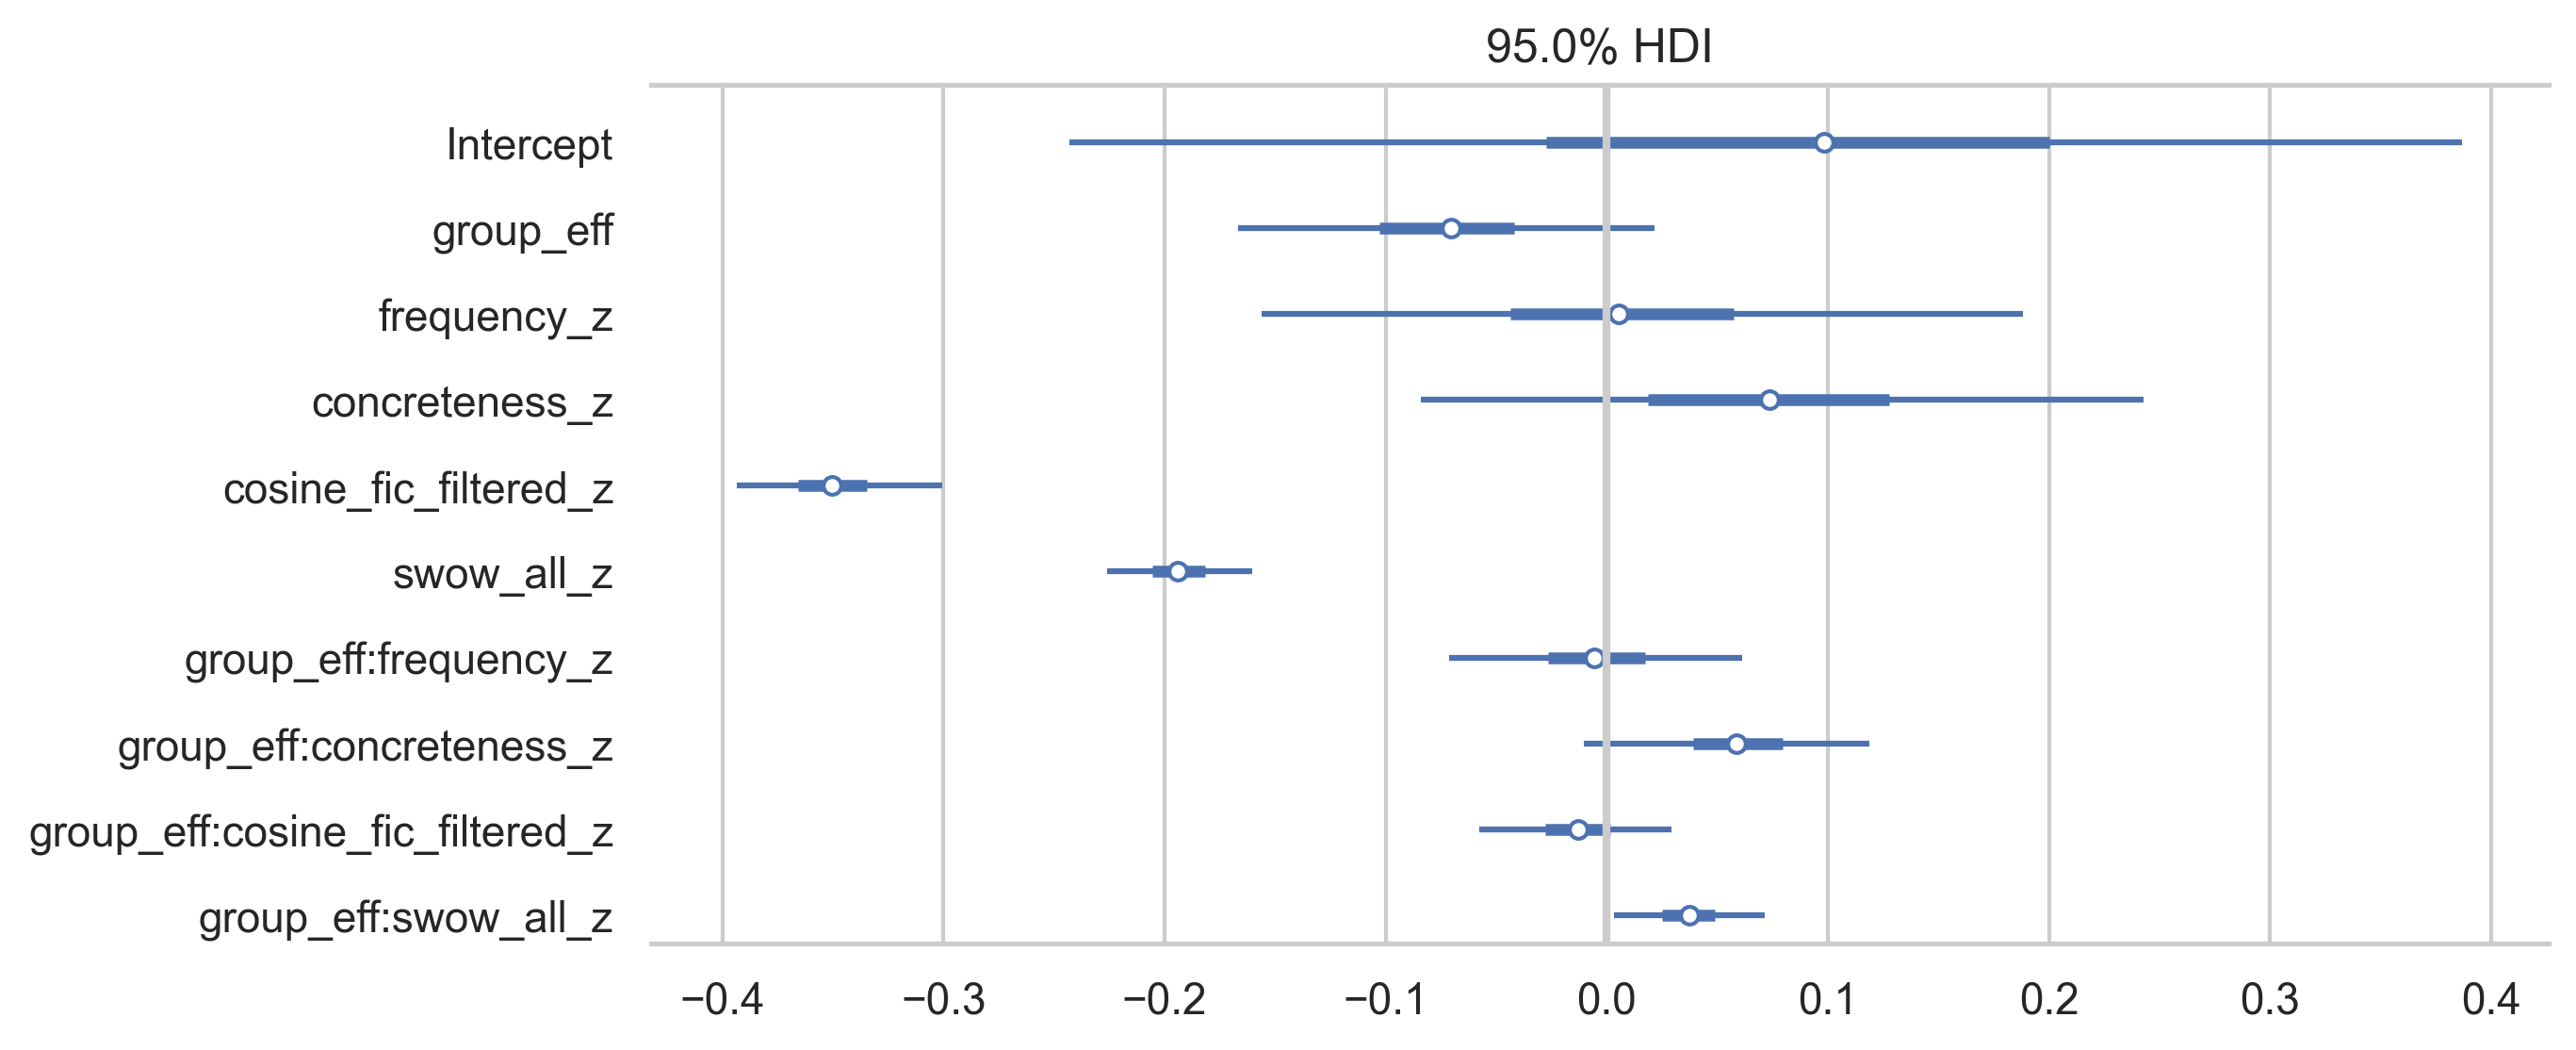

In [13]:
varnames = [
    'Intercept',
    'group_eff',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_filtered_z',
    'swow_all_z',
    'group_eff:frequency_z',
    'group_eff:concreteness_z',
    'group_eff:cosine_fic_filtered_z',
    'group_eff:swow_all_z',
]
g = az.plot_forest(r_fic_filtered, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
[INFO] finding looplift candidates


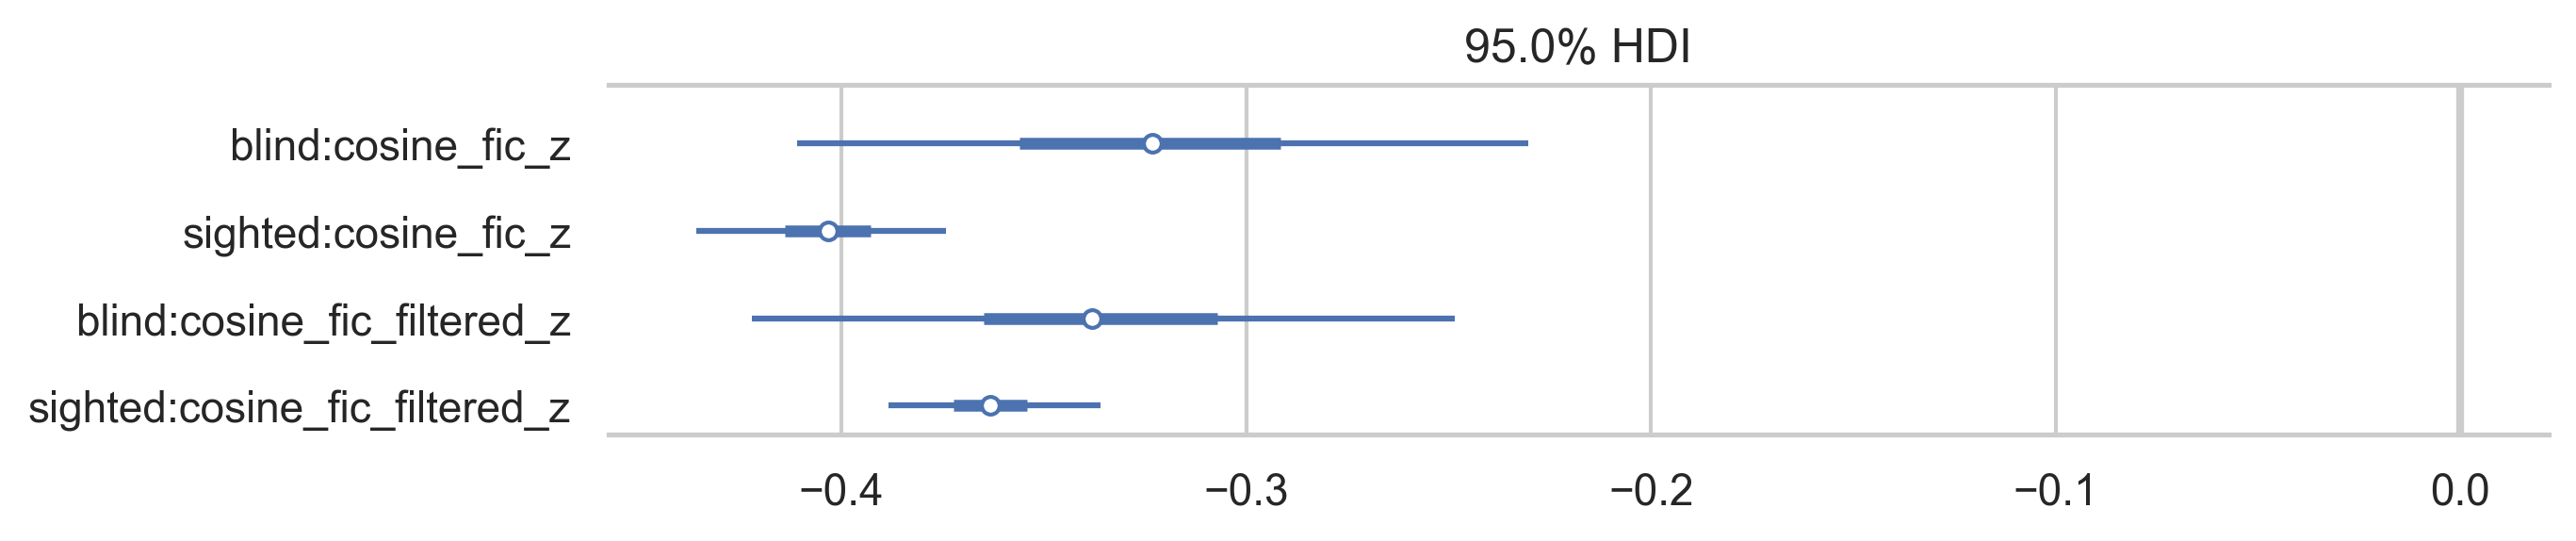

In [16]:
# compute and plot conditional effect of cosine in sighted and blind groups
from copy import deepcopy
trace_filtered = deepcopy(m_fic_filtered.backend.trace)
trace.add_values({
    # effect of cosine in blind group in orginal experiment
    'blind:cosine_fic_filtered_z': trace_filtered['cosine_fic_filtered_z'] - trace_filtered['group_eff:cosine_fic_filtered_z'],
    # effect of cosine in sighted group across both experiments
    'sighted:cosine_fic_filtered_z': trace_filtered['cosine_fic_filtered_z'] + trace_filtered['group_eff:cosine_fic_filtered_z'],
})

varnames = [
    'blind:cosine_fic_z', 'sighted:cosine_fic_z',
    'blind:cosine_fic_filtered_z', 'sighted:cosine_fic_filtered_z',
]
g = az.plot_forest(trace, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## COCA-fiction without 100 nearest neighbors of each dimension word
Filtering out the 100 nearest neighbors of each dimension word filters out a large number of sentences that include the dimension words themselves, which mean some of the dimension words are no longer represented in the word embeddings (i.e. not just degraded representations, but no vector at all). For the COCA-fiction corpus, the number of dimensions that is no longer attested is small and so we have simply replaced these NAs with zeros for this analysis. (As we will see below, this presents a larger problem for the COCA-spoken corpus.)

In [17]:
m_fic_noneighbors = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'])
r_fic_noneighbors = m_fic_noneighbors.fit(
    'rating_z ~ 1'
    + ' + group_eff*frequency_z'
    + ' + group_eff*concreteness_z'
    + ' + group_eff*cosine_fic_noneighbors_z'
    + ' + group_eff*swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_noneighbors_z + swow_all_z|pp_id',
        '1 + group_eff|dimension',
        '1 + group_eff|color',
    ],
    init='advi+adapt_diag',
    chains=2,
    draws=1000,
    tune=1000,
    n_init=10000,
    return_inferencedata=False,
)

Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 39,977
[INFO] Finished [100%]: Average Loss = 39,977
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_noneighbors_z|pp_id_offset, cosine_fic_noneighbors_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, group_eff:swow_all_z, swow_all_z, group_eff:cosine_fic_noneighbors_z, cosine_fic_noneighbors_z, group_eff:concreteness_z, concreteness_z, group_eff:frequency_z, frequency_z, group_eff, Intercept]
[INFO] NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|d

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2784 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2784 seconds.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
[INFO] The number of effective samples is smaller than 25% for some parameters.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
[INFO] finding looplift candidates


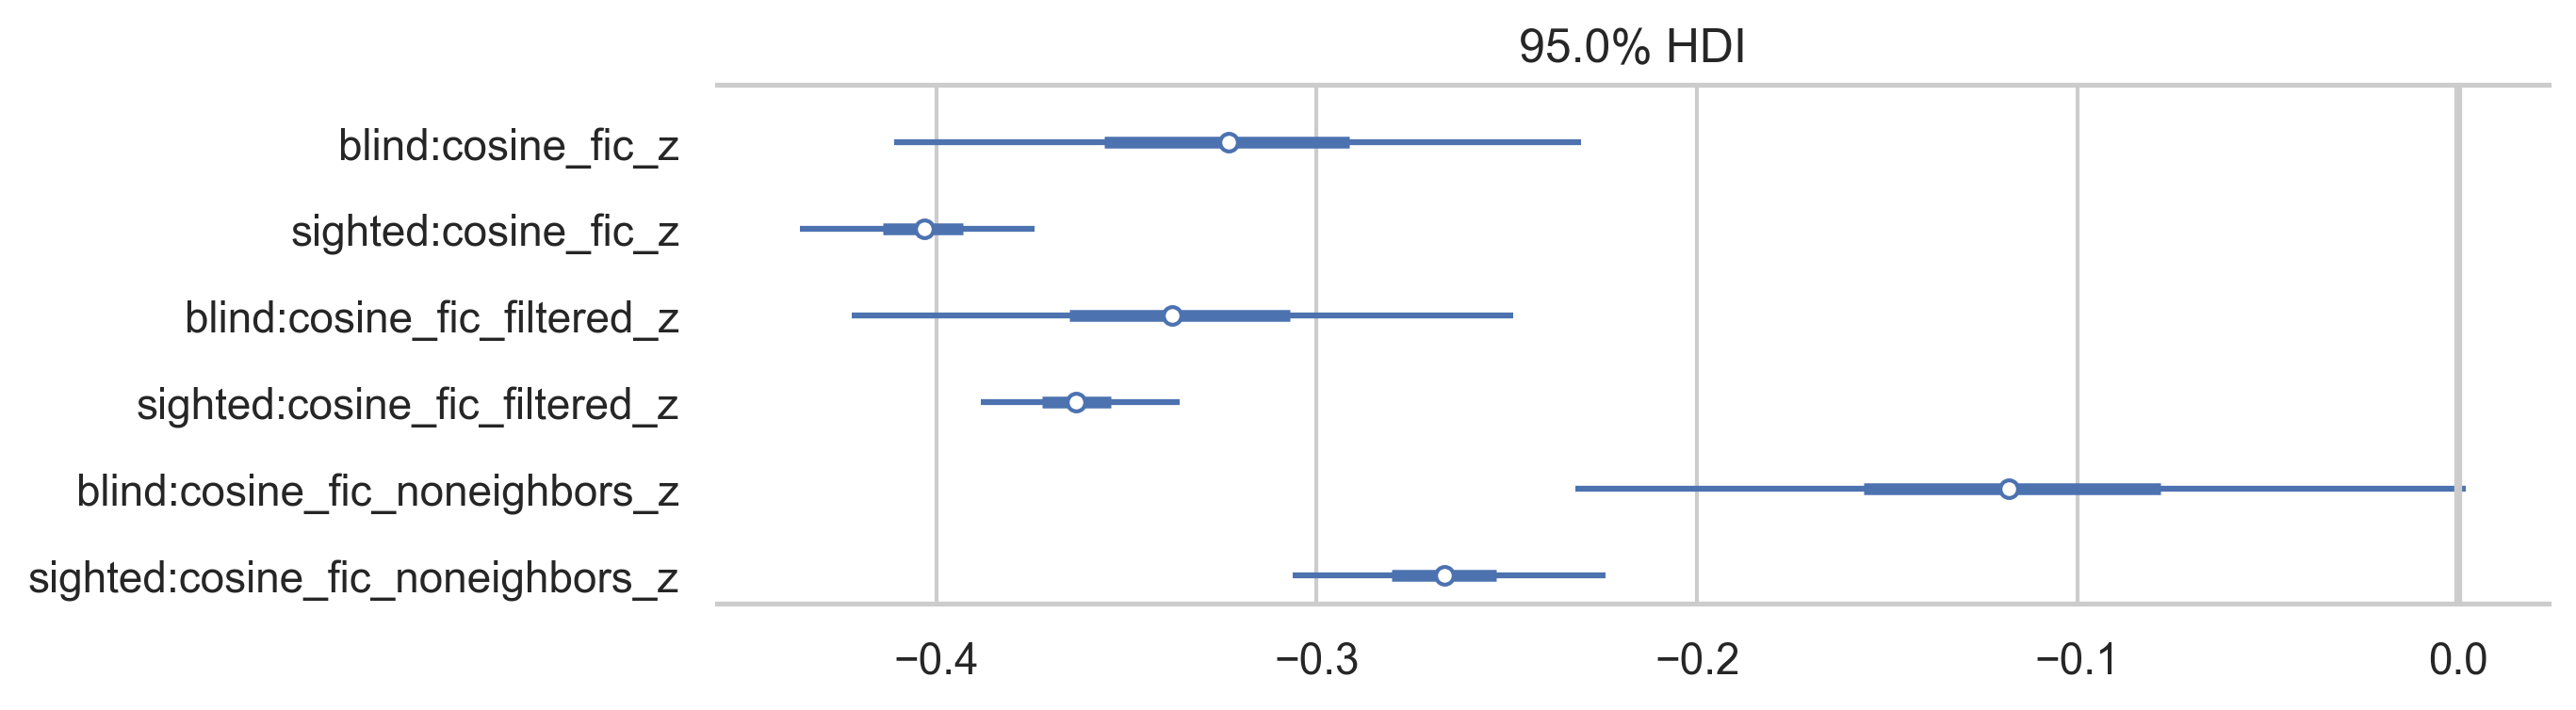

In [18]:
# compute and plot conditional effect of cosine in sighted and blind groups
from copy import deepcopy
trace_none = deepcopy(m_fic_noneighbors.backend.trace)
trace.add_values({
    # effect of cosine in blind group in orginal experiment
    'blind:cosine_fic_noneighbors_z': trace_none['cosine_fic_noneighbors_z'] - trace_none['group_eff:cosine_fic_noneighbors_z'],
    # effect of cosine in sighted group across both experiments
    'sighted:cosine_fic_noneighbors_z': trace_none['cosine_fic_noneighbors_z'] + trace_none['group_eff:cosine_fic_noneighbors_z'],
})

varnames = [
    'blind:cosine_fic_z', 'sighted:cosine_fic_z',
    'blind:cosine_fic_filtered_z', 'sighted:cosine_fic_filtered_z',
    'blind:cosine_fic_noneighbors_z', 'sighted:cosine_fic_noneighbors_z',
]
g = az.plot_forest(trace, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## COCA-fiction without names provided by participants for color-semantic dimensions

In [20]:
m_fic_nonames = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'])
r_fic_nonames = m_fic_nonames.fit(
    'rating_z ~ 1'
    + ' + group_eff*frequency_z'
    + ' + group_eff*concreteness_z'
    + ' + group_eff*cosine_fic_nonames_z'
    + ' + group_eff*swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_nonames_z + swow_all_z|pp_id',
        '1 + group_eff|dimension',
        '1 + group_eff|color',
    ],
    init='advi+adapt_diag',
    chains=2,
    draws=1000,
    tune=1000,
    n_init=10000,
    return_inferencedata=False,
)

Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 39,498
[INFO] Finished [100%]: Average Loss = 39,498
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_nonames_z|pp_id_offset, cosine_fic_nonames_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, group_eff:swow_all_z, swow_all_z, group_eff:cosine_fic_nonames_z, cosine_fic_nonames_z, group_eff:concreteness_z, concreteness_z, group_eff:frequency_z, frequency_z, group_eff, Intercept]
[INFO] NUTS: [rating_z_sigma, group_eff|color_offset, group_eff|color_sigma, 1|color_offset, 1|color_sigma, group_eff|dimension_offset, group_eff|dimension_sigma, 1|dimension_offset,

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2289 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2289 seconds.
There were 222 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 222 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
[INFO] The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


In [43]:
import pymc3 as pm
varnames = [
    'blind:cosine_fic_z', 'sighted:cosine_fic_z',
    'blind:cosine_fic_filtered_z', 'sighted:cosine_fic_filtered_z',
    'blind:cosine_fic_noneighbors_z', 'sighted:cosine_fic_noneighbors_z',
    'blind:cosine_fic_nonames_z', 'sighted:cosine_fic_nonames_z',
]
trace_df = pm.summary(trace, hdi_prob=.95, var_names=varnames)
trace_df = trace_df.reset_index()
trace_df['mean'] = -1 * trace_df['mean']
trace_df['hdi_2.5%'] = -1 * trace_df['hdi_2.5%']
trace_df['hdi_97.5%'] = -1 * trace_df['hdi_97.5%']
display(trace_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,index,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
0,blind:cosine_fic_z,0.324,0.047,0.411,0.230,0.002,0.001,703.0,703.0,702.0,1091.0,1.00
1,sighted:cosine_fic_z,0.403,0.016,0.436,0.374,0.000,0.000,2403.0,2403.0,2395.0,1560.0,1.00
2,blind:cosine_fic_filtered_z,0.336,0.044,0.422,0.248,0.002,0.001,471.0,471.0,491.0,610.0,1.00
3,sighted:cosine_fic_filtered_z,0.363,0.014,0.388,0.336,0.000,0.000,1971.0,1969.0,1964.0,1648.0,1.00
4,blind:cosine_fic_noneighbors_z,0.117,0.061,0.232,-0.002,0.002,0.002,809.0,809.0,811.0,1144.0,1.00
5,sighted:cosine_fic_noneighbors_z,0.267,0.021,0.306,0.224,0.000,0.000,1951.0,1950.0,1949.0,1426.0,1.00
6,blind:cosine_fic_nonames_z,0.048,0.028,0.103,-0.007,0.001,0.001,587.0,587.0,584.0,1171.0,1.02
7,sighted:cosine_fic_nonames_z,0.114,0.010,0.133,0.095,0.001,0.001,126.0,115.0,134.0,95.0,1.02


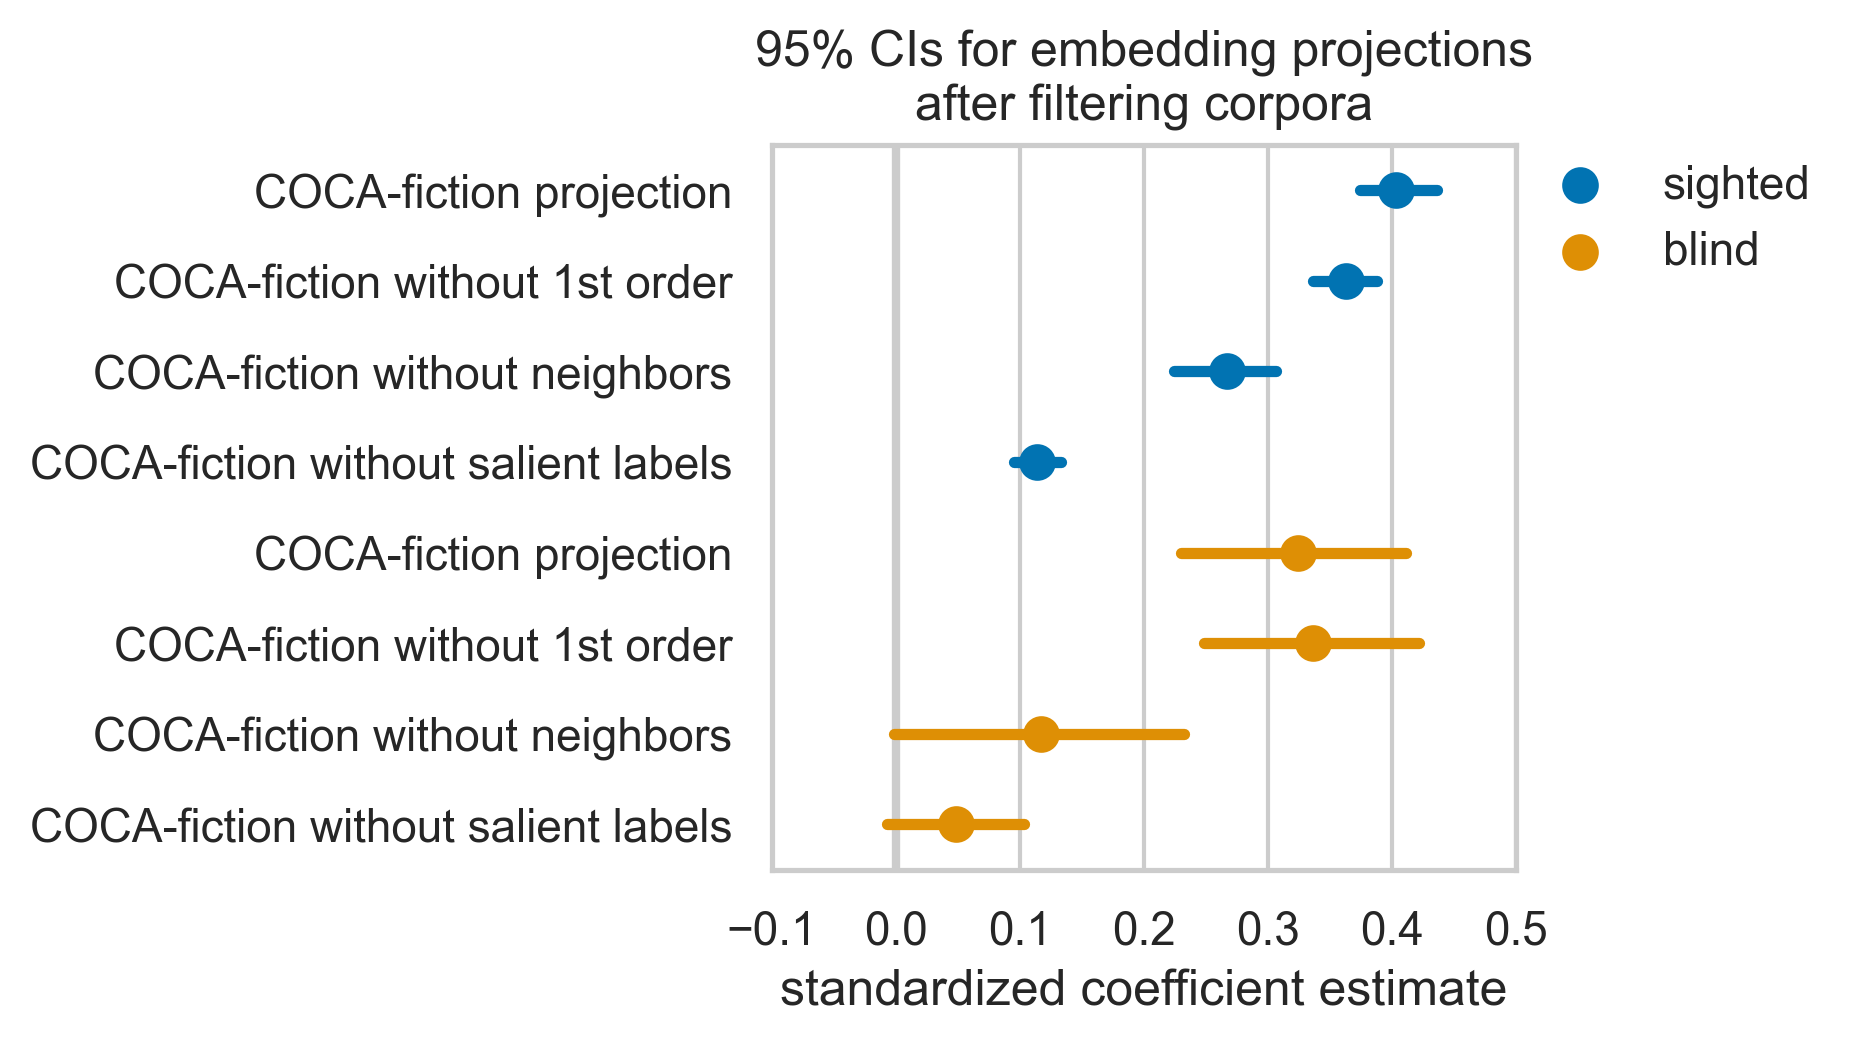

In [70]:
sns.set(palette='colorblind', style='whitegrid')
trace_df['group'] = trace_df['index'].apply(lambda x: x.split(':')[0])
trace_df = trace_df.sort_values('index', ascending=False)
g, ax = plt.subplots(figsize=[3.2, 3.2])
ax.axvline(0, color='.8', linewidth=2)
order = [
    'sighted:cosine_fic_z',
    'sighted:cosine_fic_filtered_z',
    'sighted:cosine_fic_noneighbors_z',
    'sighted:cosine_fic_nonames_z',
    'blind:cosine_fic_z',
    'blind:cosine_fic_filtered_z',
    'blind:cosine_fic_noneighbors_z',
    'blind:cosine_fic_nonames_z',
]
sns.pointplot(data=trace_df, hue='group', x='mean', y='index', join=False, ax=ax, order=order,
              palette=sns.color_palette()[0:])
hdi_df = trace_df.melt(id_vars=['index', 'group'], value_vars=['hdi_2.5%', 'hdi_97.5%'])
sns.pointplot(data=hdi_df, hue='group', markers='', x='value', order=order,
              y='index', ax=ax, join=False,
              palette=sns.color_palette()[0:])
ax.set(xlim=[-.1, .5], xticks=[-.1, 0, .1, .2, .3, .4, .5],
       ylabel='', xlabel='standardized coefficient estimate',
       title='95% CIs for embedding projections\nafter filtering corpora')
ax.set(yticklabels=[
    'COCA-fiction projection',
    'COCA-fiction without 1st order',
    'COCA-fiction without neighbors',
    'COCA-fiction without salient labels',
    'COCA-fiction projection',
    'COCA-fiction without 1st order',
    'COCA-fiction without neighbors',
    'COCA-fiction without salient labels',
])
labels = ax.get_legend_handles_labels()
ax.legend(handles=labels[0][:2], labels=labels[1][:2],
          bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, frameon=False)
plt.savefig('figures/corpus_modification_forest_new.pdf', bbox_inches='tight')

In [23]:
display(az.summary(trace, var_names=varnames, hdi_prob=.95).round(2))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
blind:cosine_fic_z,-0.32,0.05,-0.41,-0.23,0.0,0.0,703.0,703.0,702.0,1091.0,1.00
sighted:cosine_fic_z,-0.40,0.02,-0.44,-0.37,0.0,0.0,2403.0,2403.0,2395.0,1560.0,1.00
blind:cosine_fic_filtered_z,-0.34,0.04,-0.42,-0.25,0.0,0.0,471.0,471.0,491.0,610.0,1.00
sighted:cosine_fic_filtered_z,-0.36,0.01,-0.39,-0.34,0.0,0.0,1971.0,1969.0,1964.0,1648.0,1.00
blind:cosine_fic_noneighbors_z,-0.12,0.06,-0.23,0.00,0.0,0.0,809.0,809.0,811.0,1144.0,1.00
sighted:cosine_fic_noneighbors_z,-0.27,0.02,-0.31,-0.22,0.0,0.0,1951.0,1950.0,1949.0,1426.0,1.00
blind:cosine_fic_nonames_z,-0.05,0.03,-0.10,0.01,0.0,0.0,587.0,587.0,584.0,1171.0,1.02
sighted:cosine_fic_nonames_z,-0.11,0.01,-0.13,-0.10,0.0,0.0,126.0,115.0,134.0,95.0,1.02


# Convert notebook to html

In [2]:
convert_notebook('coca_filtered')

Jupyter notebook `coca_filtered` converted successfully.